How to remove outliers and null values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

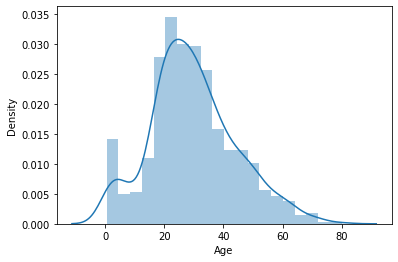

In [25]:
import seaborn as sns
sns.distplot(df['Age'].dropna())

<AxesSubplot:xlabel='Age', ylabel='Density'>

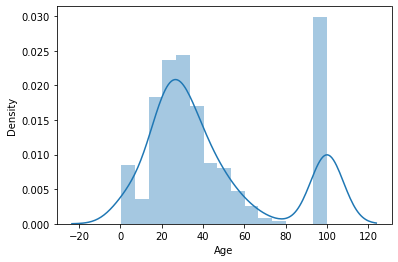

In [26]:
sns.distplot(df['Age'].fillna(100))

<AxesSubplot:>

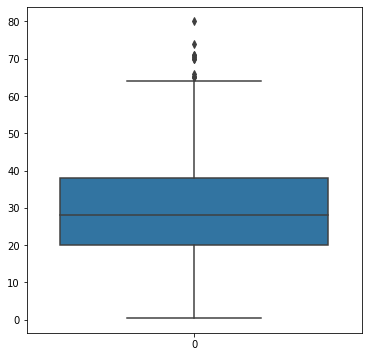

In [27]:
#for detect outliers use boxplot
plt.figure(figsize=(6,6))
sns.boxplot(data=df['Age'])

<AxesSubplot:>

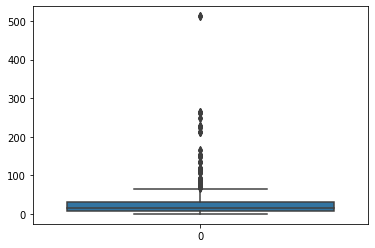

In [28]:
sns.boxplot(data=df['Fare'])

In [29]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
#if data is gaussian distribution we use this
upper_boundary=df['Age'].mean()+3*df['Age'].std()
lower_boundary=df['Age'].mean()-3*df['Age'].std()
print(upper_boundary),print(lower_boundary),print(df['Age'].mean())

73.27860964406094
-13.880374349943303
29.69911764705882


(None, None, None)

In [17]:
#for remove outliers
def remove_outlier(df,columns):
    Q1=df[columns].quantile(0.25)
    Q3=df[columns].quantile(0.75)
    IQR=Q3-Q1
    print('IQR          :',IQR)
    lower_bridge=Q1-(IQR*1.5)
    print('lower_bridge :',lower_bridge)
    upper_bridge=Q3+(IQR*1.5)
    print('upper_bridge :',upper_bridge)
    

In [18]:
age_out=remove_outlier(df,'Age')
age_out

IQR          : 17.875
lower_bridge : -6.6875
upper_bridge : 64.8125


In [19]:
#extreme outliers
def remove_outlier(df,columns):
    Q1=df[columns].quantile(0.25)
    Q3=df[columns].quantile(0.75)
    IQR=Q3-Q1
    print('IQR          :',IQR)
    lower_bridge=Q1-(IQR*3)
    print('lower_bridge :',lower_bridge)
    upper_bridge=Q3+(IQR*3)
    print('upper_bridge :',upper_bridge)

In [20]:
age_out=remove_outlier(df,'Age')
age_out

IQR          : 17.875
lower_bridge : -33.5
upper_bridge : 91.625


In [21]:
#trimming-trimming our selected data without outliers
data=df.copy()
data.loc[df['Age']<-6.6875,['Age']]=np.nan
data.loc[df['Age']>64.8125,['Age']]=np.nan

In [22]:
data.fillna(df.median,inplace=True)

In [23]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [24]:
# Capping
def cap(df,column,Higher,lower):
    df[column] =np.where(df[column] >= Higher, Higher,
                np.where(df[column] <= lower, lower,
                df[column]))
    return sns.boxplot(data=df[column]), plt.xlabel(column)

(<AxesSubplot:xlabel='Age'>, Text(0.5, 0, 'Age'))

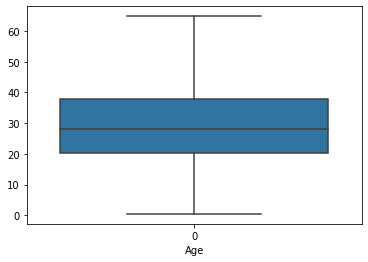

In [25]:
cap(df,'Age',64.8125,-6.6875)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

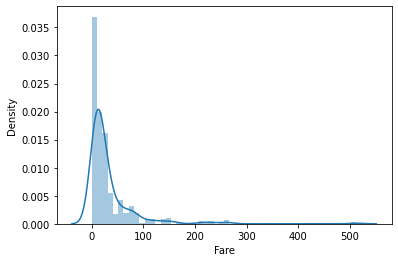

In [26]:
#fare
sns.distplot(df['Fare'].dropna())

Text(0, 0.5, 'Fare')

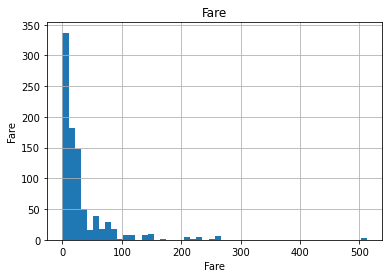

In [27]:
#if feature is skewed
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Fare')

In [28]:
Fare_out=remove_outlier(df,'Fare')
Fare_out

IQR          : 23.0896
lower_bridge : -61.358399999999996
upper_bridge : 100.2688


In [29]:
# Capping
def cap(df,Fare,Higher,lower):
    df[Fare] =np.where(df[Fare] >= Higher, Higher,
              np.where(df[Fare] <= lower, lower,
              df[Fare]))
    return sns.boxplot(data=df[Fare]), plt.xlabel(Fare)


(<AxesSubplot:xlabel='Fare'>, Text(0.5, 0, 'Fare'))

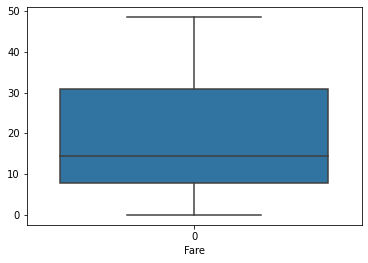

In [30]:
cap(df,'Fare',48.5094,-16.449)

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,48.5094,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,48.5094,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

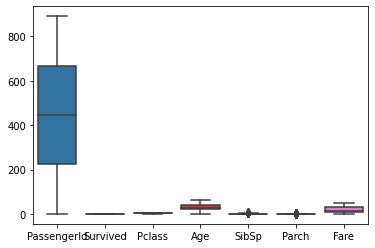

In [32]:
sns.boxplot(data=df)